In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Project
For this notebook, we will be implemeting regular gradient descent and heavy ball gradient descent.

### Basics of gradient descent.

Given a function $F :\Bbb{R}^n \to \Bbb{R}$, where $F$ is differentiable at a point a, we can consider the vector 
$b = a - \gamma \nabla{F}(a)$ where $\gamma \in \Bbb{R}$.

The idea is that for a small enough $\gamma$, we should have $F(b) \leq F(a) $. This beacause $-\nabla{F}(a)$ points in the direction of steepest
descent.

Given a specified function family, we can hard code in a formula for the gradient at a point a,
while if the functional form of $F$ is unknown, we can compute the approximate gradient numerically.

### Average Rate of change

To start, we can look at the average rate of change of a function $f:\Bbb{R} \to \Bbb{R}$ over an interval of length $\delta > 0$.

In [15]:
def average_rate_of_change(F, x, delta):
    if delta <= 0:
        print('delta must be positive')
        return None
    average_roc = (F(x + delta) - F(x))/ delta

    return average_roc

    
    
    
    
    
    
    

average rate of change over [0, 1/101] :  1e-06


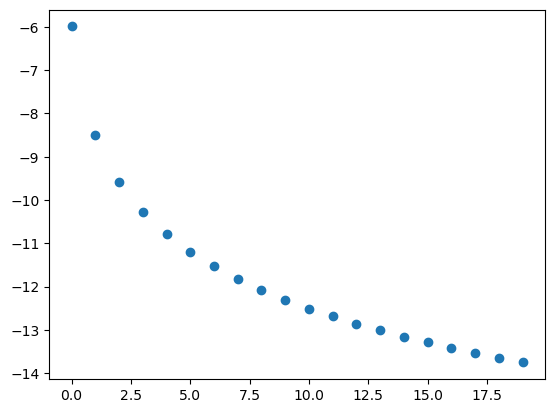

In [16]:
#Plotting average rate of change of x^3 as over the interval [0, delta_i] where delta_i = 1/(i + 1).
A = []
for i in range(100):
    v = average_rate_of_change(lambda x : x**3,0,0.1/(i+1))
    if i % 5 == 1:
        A.append(v)
print('average rate of change over [0, 1/101] : ', v)

# Plotting average rates of change against there log deltas:
plt.scatter(np.arange(len(A)) ,np.log(A))
plt.show()


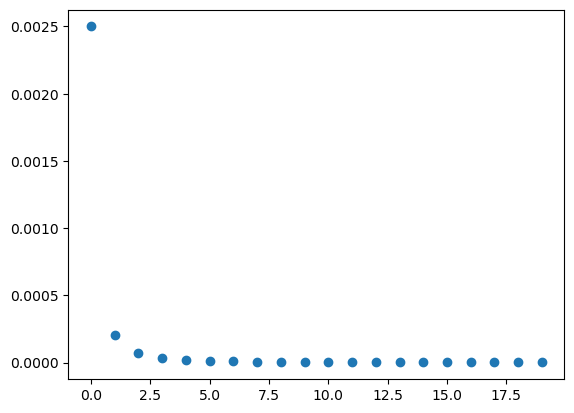

In [17]:
#Plotting average rates of change v.s. their deltas:
plt.scatter(np.arange(len(A)) ,A)

We can use our average rate of change for a small enough delta as an approximation of the derivative at x.

# Computing Gradient
Given a function $F: \Bbb{R}^n \to \Bbb{R}$, we can write a function to compute a numeric gradient at a point $a \in R^n$.

In [18]:
def approx_gradient(F,a, delta):
    
    partials = []
    
    n = len(a)
    
    a = np.array(a)
    
    w = np.zeros(n)
    for i in range(n):
        
        w[i] = delta
        
        partials.append((F(a+w)  - F(a))/delta)
        
        w[i] = 0
        
    return np.array(partials)
        
        
        
    
    

In [19]:
#Example:
# Gradient of F(x,y) = x^2 + y^2 with start point (1,0).


approx_gradient(lambda a : a[0]**2 + a[1]**2 ,[1,0],0.5)

array([2.5, 0.5])

# Gradient Descent Algorithm
We can use gradient descent to find a local minimum of a function.

In [20]:
def gradient_descent(F,a,learning_rate,tol):
    
    grad = approx_gradient(F,a,learning_rate)
    count = 0
    while np.linalg.norm(grad) > tol:
        if count % 100 == 0:
            print('loop call number: ',count+1,' | grad len:',np.linalg.norm(grad))
        a = a - grad * learning_rate
        grad = approx_gradient(F,a,learning_rate)
        
        count += 1
        
        
    print(f'local argmin: {a} | local min: {F(a)}')
    
    print(f'loop calls required for convergence: {count + 1}')
    return a
    

In [21]:
#Using our algorithm on F(x,y) = x^2 + y^2 with start point (2,0):
print(gradient_descent(lambda a : a[0]**2 + a[1]**2 ,[2,0],0.001,0.001))

loop call number:  1  | grad len: 4.0010001249684555
loop call number:  101  | grad len: 3.275085887853405
loop call number:  201  | grad len: 2.680876590300416
loop call number:  301  | grad len: 2.19447658428623
loop call number:  401  | grad len: 1.7963256855628709
loop call number:  501  | grad len: 1.470412576611009
loop call number:  601  | grad len: 1.203630924410186
loop call number:  701  | grad len: 0.9852523198186082
loop call number:  801  | grad len: 0.8064948432457859
loop call number:  901  | grad len: 0.6601699068333937
loop call number:  1001  | grad len: 0.5403931711880636
loop call number:  1101  | grad len: 0.4423479114148635
loop call number:  1201  | grad len: 0.36209131640746595
loop call number:  1301  | grad len: 0.29639593187708296
loop call number:  1401  | grad len: 0.24261987087927153
loop call number:  1501  | grad len: 0.1986005724595652
loop call number:  1601  | grad len: 0.1625678360075189
loop call number:  1701  | grad len: 0.13307263406578687
loop c

In [22]:
# Using our algorithm on f(x,y) = x^2 + (y - 1)^2 + 5 with start point (2,0).
print(gradient_descent(lambda a : a[0]**2 + (a[1] - 1)**2 + 5 ,[2,0],0.001,0.001))

loop call number:  1  | grad len: 4.472583369819846
loop call number:  101  | grad len: 3.661108277735923
loop call number:  201  | grad len: 2.9968617045259016
loop call number:  301  | grad len: 2.4531315095667137
loop call number:  401  | grad len: 2.008052021267099
loop call number:  501  | grad len: 1.6437247266963935
loop call number:  601  | grad len: 1.3454984973188995
loop call number:  701  | grad len: 1.101380405663625
loop call number:  801  | grad len: 0.9015534394106475
loop call number:  901  | grad len: 0.7379817181543467
loop call number:  1001  | grad len: 0.6040873369479068
loop call number:  1101  | grad len: 0.49448584115841204
loop call number:  1201  | grad len: 0.4047696949605065
loop call number:  1301  | grad len: 0.33133103583867163
loop call number:  1401  | grad len: 0.27121658730055576
loop call number:  1501  | grad len: 0.22200889524486192
loop call number:  1601  | grad len: 0.1817291119926168
loop call number:  1701  | grad len: 0.14875741852301247
loo

Both of these examples are for paraboloids, which have a single global minimum , and we see the results that we expect.

# Heavy Ball Gradient Descent

Now we want to create an algorithm that takes into acount the curvature of our objective function. This means that
out step size calculation at each iteration of the algorithm will take into account how large or small our previous step was, and what its direction was. We do this by adding a term proportional to the previous step.

In [23]:
def heavy_ball_descent(F,a,learning_rate,momentum_factor ,tol):
    
    
    a = np.array(a)
      
    grad = approx_gradient(F,a,learning_rate)
    count = 0
    
    
    
    
    
    a_prev = a
    
    a = a - grad * learning_rate   +  momentum_factor*(a - a_prev)
    
    
    grad = approx_gradient(F,a,learning_rate)
        
        
   





    while np.linalg.norm(grad) > tol:
        if count % 10 == 0:
            print('loop call number: ',count+1,' | grad len:',np.linalg.norm(grad))
            
             
                
        
        a = a - grad * learning_rate   +  momentum_factor*(a - a_prev)
        grad = approx_gradient(F,a,learning_rate)
        
        
        
        
        
        
        
        
        count += 1
        
        
        
        
        
        
        
        
    print(f'local argmin: {a} | local min: {F(a)}')
    
    print(f'loop calls required for convergence: {count + 1}')
    return a

In [24]:
# Using our algorithm on f(x,y) = x^2 + (y - 1)^2 + 5 with start point (2,0), with a weight of 0.02 on the previous step vector.
print(heavy_ball_descent(lambda a : a[0]**2 + (a[1] - 1)**2 + 5 ,[2,0],0.001,0.01,0.001))

loop call number:  1  | grad len: 4.463638203082851
loop call number:  11  | grad len: 4.3701546729175424
loop call number:  21  | grad len: 4.268917402961235
loop call number:  31  | grad len: 4.159283280129922
loop call number:  41  | grad len: 4.040555850065633
loop call number:  51  | grad len: 3.9119808928703184
loop call number:  61  | grad len: 3.7727416319140215
loop call number:  71  | grad len: 3.6219535452230733
loop call number:  81  | grad len: 3.4586587465326923
loop call number:  91  | grad len: 3.2818199002773403
loop call number:  101  | grad len: 3.0903136318846407
loop call number:  111  | grad len: 2.882923391507008
loop call number:  121  | grad len: 2.658331725835681
loop call number:  131  | grad len: 2.415111908950622
loop call number:  141  | grad len: 2.151718878987109
loop call number:  151  | grad len: 1.8664794230822124
loop call number:  161  | grad len: 1.5575815482363204
loop call number:  171  | grad len: 1.2230629705695508
loop call number:  181  | gra

In [25]:
def heavy_ball_descent_graph(F,a,learning_rate,momentum_factor ,tol):
    
    vals = []
    
    
    
    a = np.array(a)
      
    grad = approx_gradient(F,a,learning_rate)
    count = 0
    
    vals.append(F(a))
    
    count = 1
    
    a_prev = a
    
    a = a - grad * learning_rate   +  momentum_factor*(a - a_prev)
    
    
    grad = approx_gradient(F,a,learning_rate)
        
        





    while np.linalg.norm(grad) > tol:
        if count % 10 == 1:
            print('loop call number: ',count,' | grad len:',np.linalg.norm(grad))
            vals.append(F(a))
            
             
                
        
        a = a - grad * learning_rate   +  momentum_factor*(a - a_prev)
        grad = approx_gradient(F,a,learning_rate)
        

        
        
        
        count += 1
        
        
        
        
        
        
        
        
    print(f'local argmin: {a} | local min: {F(a)}')
    
    print(f'terms in sequence required for convergence: {count + 1}')
    
    
    
    plt.scatter(np.arange(len(vals)) , np.array(vals))
    
    return a

loop call number:  1  | grad len: 4.463638203082851
loop call number:  11  | grad len: 4.3701546729175424
loop call number:  21  | grad len: 4.268917402961235
loop call number:  31  | grad len: 4.159283280129922
loop call number:  41  | grad len: 4.040555850065633
loop call number:  51  | grad len: 3.9119808928703184
loop call number:  61  | grad len: 3.7727416319140215
loop call number:  71  | grad len: 3.6219535452230733
loop call number:  81  | grad len: 3.4586587465326923
loop call number:  91  | grad len: 3.2818199002773403
loop call number:  101  | grad len: 3.0903136318846407
loop call number:  111  | grad len: 2.882923391507008
loop call number:  121  | grad len: 2.658331725835681
loop call number:  131  | grad len: 2.415111908950622
loop call number:  141  | grad len: 2.151718878987109
loop call number:  151  | grad len: 1.8664794230822124
loop call number:  161  | grad len: 1.5575815482363204
loop call number:  171  | grad len: 1.2230629705695508
loop call number:  181  | gra

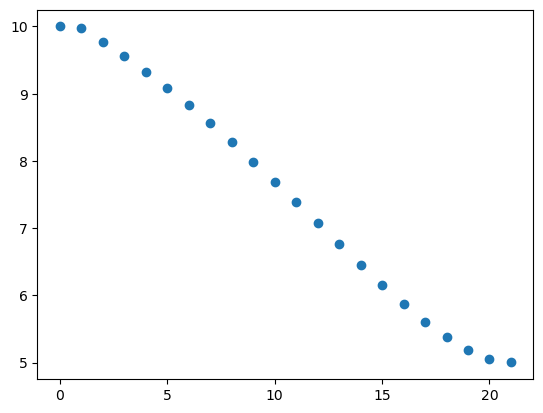

In [26]:
print(heavy_ball_descent_graph(lambda a : a[0]**2 + (a[1] - 1)**2 + 5 ,[2,0],0.001,0.01,0.001))

# Comparing Algorithms

We see that at least on the function $f(x,y) = x^2 + (y - 1)^2 + 5$, with start point $(2,0)$, 
the heavy ball algorithm minimises f in 203 iterations, while the regular gradient descent algorithm takes 4200 iterations.
